In [24]:
#import Python Librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# import Data from  Csv file

data=pd.read_csv("D:\\github-d\\AI-ML\\Datasets\\kc_house_data.csv")
print(data)

       bedrooms  bathrooms  floors     price
0             3       1.00     1.0  221900.0
1             3       2.25     2.0  538000.0
2             2       1.00     1.0  180000.0
3             4       3.00     1.0  604000.0
4             3       2.00     1.0  510000.0
...         ...        ...     ...       ...
21608         3       2.50     3.0  360000.0
21609         4       2.50     2.0  400000.0
21610         2       0.75     2.0  402101.0
21611         3       2.50     2.0  400000.0
21612         2       0.75     2.0  325000.0

[21613 rows x 4 columns]


In [26]:
# Sepereate the Data as X and y

X=data.drop(['price'],axis=1)
y=data['price']

X,y

(       bedrooms  bathrooms  floors
 0             3       1.00     1.0
 1             3       2.25     2.0
 2             2       1.00     1.0
 3             4       3.00     1.0
 4             3       2.00     1.0
 ...         ...        ...     ...
 21608         3       2.50     3.0
 21609         4       2.50     2.0
 21610         2       0.75     2.0
 21611         3       2.50     2.0
 21612         2       0.75     2.0
 
 [21613 rows x 3 columns],
 0        221900.0
 1        538000.0
 2        180000.0
 3        604000.0
 4        510000.0
            ...   
 21608    360000.0
 21609    400000.0
 21610    402101.0
 21611    400000.0
 21612    325000.0
 Name: price, Length: 21613, dtype: float64)

In [27]:
# Standerdization of Data
# make sure those are must be contain numaric values

X=((X-X.mean())/X.std())


# Make them Arrays, we have to do matrix multiplication with arrays
X=np.array(X)
# To See the result of X and y
X

array([[-0.39872792, -1.44743008, -0.91540583],
       [-0.39872792,  0.17560263,  0.93648411],
       [-1.47392526, -1.44743008, -0.91540583],
       ...,
       [-1.47392526, -1.77203663,  0.93648411],
       [-0.39872792,  0.50020918,  0.93648411],
       [-1.47392526, -1.77203663,  0.93648411]])

In [28]:

# for y predction
def predict_y(w,x,b):
    y_pred=[]
    for i in range (len(x)):
        y_pred.append(w@x[i]+b)
    return np.array(y_pred)

# for loss function
def loss(y,y_pred):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_pred[i])**2
        #print(f"S is {s}")
    return (1/n)*s

# for Gradient(dw)
def dldw(x,y,y_pred):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_pred[i])
    return (2/n)*s
# for intercept (db)
def dldb(y,y_pred):
    s=0
    n=len(y)
    for i in range(n):
        s+=-(y[i]-y_pred[i])
    return (2/n)*s



# gradient Descent method
def gradient(x,y):
    lr=0.001 #learning rate
    w=np.random.randn(x.shape[1]) # initialise random weights
    loss_list=[] # for loss function take empty list
    b=0
    iters=2000

    
    for i in range(iters):
        
        # y predictions
        y_pred=predict_y(w,x,b)
        #print(f"y_predict:{y_pred}")
     
        
        # for gradient (dw)
        w=w-lr*dldw(x,y,y_pred)
        #print(f"w is: {dw}")
        
        # for intercept (db) 
        b=b-lr*dldb(y,y_pred)
       
        #for loss function
        loss_list.append(loss(y,y_pred))
        #print('Loss is: {loss_list}')
    plt.plot(np.arange(1,iters),loss_list[1:])
    plt.xlabel("Iters")
    plt.ylabel("Loss")
    return w,b



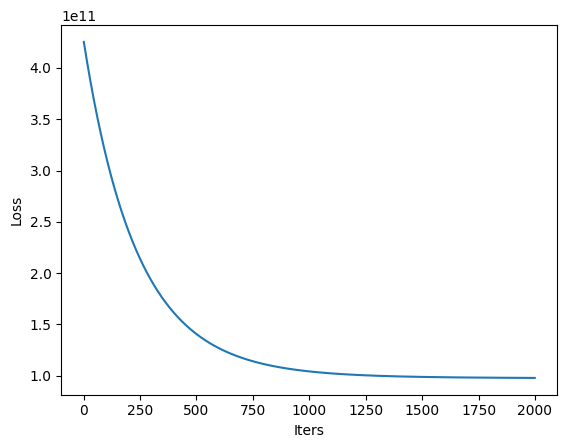

In [29]:
# w,b=gradient(X,y)
w,b=gradient(X,y)


In [30]:
def predict(input):
    y_lst=[]
    for i in range(len(input)):
        y_lst.append(w@input[i]+b)
    return np.array(y_lst)
    
    
    
yhat=predict(X)

df=pd.DataFrame()
df['y_actual']=y
df['ypredict']=np.round(yhat,1)
df


,y_actual,ypredict
0,221900.0,272000.9
1,538000.0,557917.3
2,180000.0,236849.9
3,604000.0,725612.7
4,510000.0,481231.3
...,...,...
21608,360000.0,634603.2
21609,400000.0,645375.9
21610,402101.0,208920.7
21611,400000.0,610224.9


In [31]:
from sklearn.metrics import r2_score
r2_score(y,yhat)

0.2745110274400556